# Translating

In [17]:
import numpy as np
import pandas as pd
import re
import nltk
import string
import seaborn as sns

pd.options.mode.chained_assignment = None

from googletrans import Translator
pd.set_option('display.max_colwidth', None)


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Dataset/tweet_scrape_result_merged.csv')
df.head()

,Datetime,Tweet Id,Tweet,Username,Language
0,2020-11-05 08:25:32+00:00,1324266586883026945,"Indonesia Resesi, Pengusaha Sebut Pertumbuhan Ekonomi Baru Bangkit di 2023 https://t.co/Xp2EtHsrKP",liputan6dotcom,in
1,2020-10-17 10:36:09+00:00,1317414089144987649,"Pengamat mengatakan, pertumbuhan ekonomi baru bisa normal pada 2023. Namun, jika tidak ada perbaikan dalam penanganan pandemi dan resesi ekonomi terus berlanjut hingga 2021, Indonesia kemungkinan akan masuk ke jurang depresi ekonomi.\n\n#WaktunyaLokadata https://t.co/AwZlqdViU8",LokadataID,in
2,2020-09-28 05:23:24+00:00,1310450011230990342,"Pengamat mengatakan, pertumbuhan ekonomi baru bisa normal pada 2023. Namun, jika tidak ada perbaikan dalam penanganan pandemi dan resesi ekonomi terus berlanjut hingga 2021, Indonesia kemungkinan akan masuk ke jurang depresi ekonomi.\n\n#WaktunyaLokadata https://t.co/AwZlqdViU8",LokadataID,in
3,2020-09-24 13:42:22+00:00,1309126027755556864,"Kalau Kanker, Sepertinya Sudah Masuk Stadium Empat, Sudah Keropos, Menunggu Ambruk Bagai Anjing Mencret yg Sudah Kehilangan Tenaga.\nIni Bukan Kabar Baik, Ekonomi Indonesia Diprediksi Baru Sembuh dari Resesi pada 2023, Kebangkrutan Massal Sulit D... https://t.co/780pIX3sf3",myputun,in
4,2020-09-24 07:31:13+00:00,1309032626439757826,"Ini Bukan Kabar Baik, Ekonomi Indonesia Diprediksi Baru Sembuh dari Resesi pada 2023, Kebangkrutan Massal Sulit Dihindari https://t.co/fvPodFfNua",BizlawIndonesia,in


In [3]:
translator = Translator()

df['English'] = df['Tweet'].apply(translator.translate, src='id', dest='en')
df['English'] = df['English'].apply(getattr, args=('text',))
df.head()

,Datetime,Tweet Id,Tweet,Username,Language,English
0,2020-11-05 08:25:32+00:00,1324266586883026945,"Indonesia Resesi, Pengusaha Sebut Pertumbuhan Ekonomi Baru Bangkit di 2023 https://t.co/Xp2EtHsrKP",liputan6dotcom,in,"Indonesia Recession, Entrepreneur Says New Economic Growth Will Rise in 2023 https://t.co/Xp2EtHsrKP"
1,2020-10-17 10:36:09+00:00,1317414089144987649,"Pengamat mengatakan, pertumbuhan ekonomi baru bisa normal pada 2023. Namun, jika tidak ada perbaikan dalam penanganan pandemi dan resesi ekonomi terus berlanjut hingga 2021, Indonesia kemungkinan akan masuk ke jurang depresi ekonomi.\n\n#WaktunyaLokadata https://t.co/AwZlqdViU8",LokadataID,in,"Observers say that economic growth will only return to normal in 2023. However, if there is no improvement in handling the pandemic and the economic recession continues until 2021, Indonesia is likely to enter the brink of economic depression.\n\n#TimeLokadata https://t.co/AwZlqdViU8"
2,2020-09-28 05:23:24+00:00,1310450011230990342,"Pengamat mengatakan, pertumbuhan ekonomi baru bisa normal pada 2023. Namun, jika tidak ada perbaikan dalam penanganan pandemi dan resesi ekonomi terus berlanjut hingga 2021, Indonesia kemungkinan akan masuk ke jurang depresi ekonomi.\n\n#WaktunyaLokadata https://t.co/AwZlqdViU8",LokadataID,in,"Observers say that economic growth will only return to normal in 2023. However, if there is no improvement in handling the pandemic and the economic recession continues until 2021, Indonesia is likely to enter the brink of economic depression.\n\n#TimeLokadata https://t.co/AwZlqdViU8"
3,2020-09-24 13:42:22+00:00,1309126027755556864,"Kalau Kanker, Sepertinya Sudah Masuk Stadium Empat, Sudah Keropos, Menunggu Ambruk Bagai Anjing Mencret yg Sudah Kehilangan Tenaga.\nIni Bukan Kabar Baik, Ekonomi Indonesia Diprediksi Baru Sembuh dari Resesi pada 2023, Kebangkrutan Massal Sulit D... https://t.co/780pIX3sf3",myputun,in,"If it's cancer, it looks like it's already entered stage four, it's already rotting, waiting to collapse like a dog with diarrhea that has lost its strength.\nThis is not good news, the Indonesian economy is predicted to only recover from recession in 2023, mass bankruptcy is difficult... https://t.co/780pIX3sf3"
4,2020-09-24 07:31:13+00:00,1309032626439757826,"Ini Bukan Kabar Baik, Ekonomi Indonesia Diprediksi Baru Sembuh dari Resesi pada 2023, Kebangkrutan Massal Sulit Dihindari https://t.co/fvPodFfNua",BizlawIndonesia,in,"This is not good news, the Indonesian economy is predicted to only recover from recession in 2023, mass bankruptcy is difficult to avoid https://t.co/fvPodFfNua"


# Labelling

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [6]:
scores=[]
composes=[]
for i in range(len(df['English'])):
    
    score = analyser.polarity_scores(df['English'][i])
    compose = score
    score=score['compound']
    scores.append(score)
    composes.append(compose)
sentiment=[]
for i in scores:
    if i>=0.05: # nilai compound lebih dari sama ddengan posifit
        sentiment.append('Positive')
    elif i<=(-0.05): # nilai compound kurang dari sama ddengan negatif
        sentiment.append('Negative')
    else: # nilai compound diantara -0.05 - +0.05 sama ddengan netral
        sentiment.append('Neutral')
df['Sentiment']=pd.Series(np.array(sentiment))
df['Composes']=pd.Series(np.array(composes))

In [8]:
df.to_csv(r'Labelled_dataset.csv', index = False, header = True,index_label=None)
df.head()

,Datetime,Tweet Id,Tweet,Username,Language,English,Sentiment,Composes
0,2020-11-05 08:25:32+00:00,1324266586883026945,"Indonesia Resesi, Pengusaha Sebut Pertumbuhan Ekonomi Baru Bangkit di 2023 https://t.co/Xp2EtHsrKP",liputan6dotcom,in,"Indonesia Recession, Entrepreneur Says New Economic Growth Will Rise in 2023 https://t.co/Xp2EtHsrKP",Negative,"{'neg': 0.182, 'neu': 0.649, 'pos': 0.169, 'compound': -0.0516}"
1,2020-10-17 10:36:09+00:00,1317414089144987649,"Pengamat mengatakan, pertumbuhan ekonomi baru bisa normal pada 2023. Namun, jika tidak ada perbaikan dalam penanganan pandemi dan resesi ekonomi terus berlanjut hingga 2021, Indonesia kemungkinan akan masuk ke jurang depresi ekonomi.\n\n#WaktunyaLokadata https://t.co/AwZlqdViU8",LokadataID,in,"Observers say that economic growth will only return to normal in 2023. However, if there is no improvement in handling the pandemic and the economic recession continues until 2021, Indonesia is likely to enter the brink of economic depression.\n\n#TimeLokadata https://t.co/AwZlqdViU8",Negative,"{'neg': 0.185, 'neu': 0.762, 'pos': 0.054, 'compound': -0.7491}"
2,2020-09-28 05:23:24+00:00,1310450011230990342,"Pengamat mengatakan, pertumbuhan ekonomi baru bisa normal pada 2023. Namun, jika tidak ada perbaikan dalam penanganan pandemi dan resesi ekonomi terus berlanjut hingga 2021, Indonesia kemungkinan akan masuk ke jurang depresi ekonomi.\n\n#WaktunyaLokadata https://t.co/AwZlqdViU8",LokadataID,in,"Observers say that economic growth will only return to normal in 2023. However, if there is no improvement in handling the pandemic and the economic recession continues until 2021, Indonesia is likely to enter the brink of economic depression.\n\n#TimeLokadata https://t.co/AwZlqdViU8",Negative,"{'neg': 0.185, 'neu': 0.762, 'pos': 0.054, 'compound': -0.7491}"
3,2020-09-24 13:42:22+00:00,1309126027755556864,"Kalau Kanker, Sepertinya Sudah Masuk Stadium Empat, Sudah Keropos, Menunggu Ambruk Bagai Anjing Mencret yg Sudah Kehilangan Tenaga.\nIni Bukan Kabar Baik, Ekonomi Indonesia Diprediksi Baru Sembuh dari Resesi pada 2023, Kebangkrutan Massal Sulit D... https://t.co/780pIX3sf3",myputun,in,"If it's cancer, it looks like it's already entered stage four, it's already rotting, waiting to collapse like a dog with diarrhea that has lost its strength.\nThis is not good news, the Indonesian economy is predicted to only recover from recession in 2023, mass bankruptcy is difficult... https://t.co/780pIX3sf3",Negative,"{'neg': 0.268, 'neu': 0.608, 'pos': 0.125, 'compound': -0.8558}"
4,2020-09-24 07:31:13+00:00,1309032626439757826,"Ini Bukan Kabar Baik, Ekonomi Indonesia Diprediksi Baru Sembuh dari Resesi pada 2023, Kebangkrutan Massal Sulit Dihindari https://t.co/fvPodFfNua",BizlawIndonesia,in,"This is not good news, the Indonesian economy is predicted to only recover from recession in 2023, mass bankruptcy is difficult to avoid https://t.co/fvPodFfNua",Negative,"{'neg': 0.331, 'neu': 0.669, 'pos': 0.0, 'compound': -0.8362}"


In [15]:
print("Sentiment :",df['Sentiment'].unique(),"\n\nTotal Each Sentiment :", df['Sentiment'].value_counts())

Sentiment : ['Negative' 'Positive' 'Neutral'] 

Total Each Sentiment : Sentiment
Negative    1570
Positive     617
Neutral      112
Name: count, dtype: int64


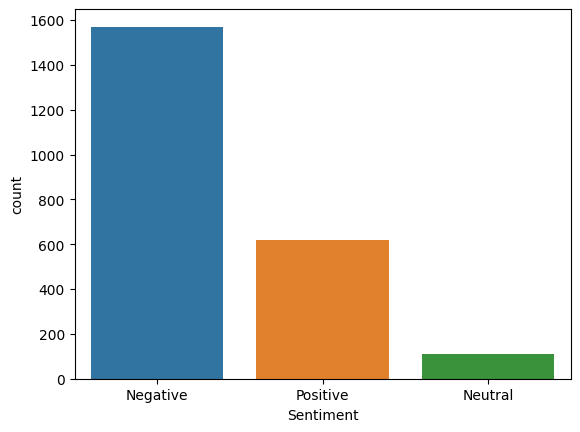

In [18]:
ax = sns.countplot(x="Sentiment", data=df)